## <font color=blue> Calculus - Vector data points for 2D 

This is part of the series of math algorithms to define 2D shapes as math objects.

## 
### <font color=blue> Problem: 
Create math (and Python) objects based on certain specifications.
* Section 1. Vector, 2D



## <font color=purple> SECTION 1: Vectors, 2D 

### <font color=blue>1a. Create Vector Object

In [1]:
# 
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


class Vector:
    def __init__(self,name='Vector', start = (0,0), end = (0,0),c='r'):              # includes default values
        self.name = name                # name of object
        self.start = start              # starting coordinates (x1,y1)
        self.end = end                  # ending coordinates (x2,y2)
        self.color = c                  # Color for plot
        
        # Generate length of vector
        len = math.sqrt((start[0]-end[0])**2 + (start[1]-end[1])**2)   # sqrt of ((x1-x2)**2 + (y1-y2)**2)
        self.len = float(np.format_float_scientific(len, precision=4, unique=False,  trim='k'))  # convert to 4 significant figures 
        
        # Generate vector components
        x = abs(self.start[0] - self.end[0])
        if self.start[0] > self.end[0]: x = -x
        x = float(np.format_float_scientific(x, precision=4, unique=False,  trim='k'))
        
        y = abs(self.start[1] - self.end[1])
        if self.start[1] > self.end[1]: y = -y
        y = float(np.format_float_scientific(y, precision=4, unique=False,  trim='k'))  
        self.vector = (x,y)
    
        # Generate slope of vector (change of y / change of x)
        l_slope = (self.start[1]-self.end[1]) / (self.start[0] - self.end[0])
        self.l_slope = float(np.format_float_scientific(l_slope, precision=4, unique=False,  trim='k'))  # convert to 4 significant figures 
        
        # Generate number of datapoints 
        self.n = int(len * 2)                  # number of points: 20 * len of line
        
        # Calculate the y_intercept.  y = mx + b --> b = y - mx   (where b is the y_intercept)
        self.b1 = self.start[1] - self.l_slope * self.start[0]     
        
        # Generate points for vector
        x_incr = abs(start[0]-end[0]) / self.n    # len of x side divided by number of points 
        if start[0] > end[0]: x_incr = -x_incr        #  neg increments if x_start > x_end
        x_list = [self.start[0] + x_incr*x_idx  for x_idx in range(0, self.n+1)]  # these are x values
        self.x_list = [float(np.format_float_scientific(x, precision=4, unique=False,  trim='k')) for x in x_list]  # convert to 4 significant figures 
        # calculate y values based on y = mx + b
        y_list = [self.l_slope*x + self.b1 for x in x_list]
        self.y_list = [float(np.format_float_scientific(y, precision=4, unique=False,  trim='k')) for y in y_list]  # convert to 4 significant figures    
       
    def slope(self):
        return self.l_slope
    def length(self):
        return self.len
    def datapoints(self):               # provide list of datapoints, (x,y) tuples
        self.datapoints = [(x,y) for x,y in zip(self.x_list,self.y_list)]   # convert list of tuples
        return self.datapoints
    def image(self): 
        plt.style.use('ggplot')
        plt.title(self.name, loc='center', fontsize=18)        
        str_note= 'Start ' + str(self.start)
        end_note= 'End ' + str(self.end)
        plt.xlabel('x', fontsize = 14, color='black')
        plt.ylabel('y', fontsize = 14, color='black')
        plt.annotate(str_note, self.start, ha='center',textcoords="offset points",xytext=(200,0),
                    arrowprops=dict(facecolor='black', shrink=0.02)) 
        plt.annotate(end_note, self.end,textcoords="offset points",xytext=(200,0), ha='center', 
                     arrowprops=dict(facecolor='black', shrink=0.02))
        plt.scatter(self.x_list[1:-1], self.y_list[1:-1], color=self.color)
        plt.scatter(self.start[0], self.start[1], marker = '*', color = 'r')
        plt.scatter(self.end[0], self.end[1], marker = 'd', color = 'r')   
        return
    def __repr__(self):                                      # added method for print
        return 'Vector features: name = %s, vector = %s, start = %s, end = %s, length = %s, slope = %s, y_intercept = %s  ' % (self.name, 
            self.vector, self.start, self.end, self.len, self.l_slope, self.b1)
        

### <font color=blue>1b. Create Vector Instance (for testing)

Vector features: name = Vector1, vector = (3.0, -3.0), start = (1, 6), end = (4, 3), length = 4.2426, slope = -1.0, y_intercept = 7.0  
Vector: (3.0, -3.0)


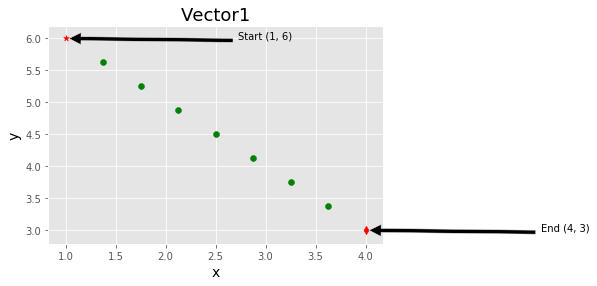

Vector data points, (x,y) values: [(1.0, 6.0), (1.375, 5.625), (1.75, 5.25), (2.125, 4.875), (2.5, 4.5), (2.875, 4.125), (3.25, 3.75), (3.625, 3.375), (4.0, 3.0)]


In [2]:
if __name__ == '__main__':                           # testing only (not execute if called)
    vector_1 = Vector(name='Vector1', start = (1,6), end = (4,3), c='g')   # Create vector
    
    print(vector_1)                         # Print object features
    print('Vector:', vector_1.vector)
    
    vector_1.image()                        # Create plot
    plt.show()                            # Show plot
    
    print('Vector data points, (x,y) values:', vector_1.datapoints())
